## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [15]:
import zipfile
import csv
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Your code here - remember to use markdown cells for comments as well!
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')
    
con = sqlite3.connect('./zippedData/im.db')

In [17]:
person = pd.read_sql("""
SELECT *
FROM persons;
""", con)
person

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [18]:
principals=pd.read_sql("""
SELECT *
FROM principals;
""", con)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [19]:
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz',sep="\t")

In [20]:
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')

In [21]:
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

In [22]:
tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')

In [23]:
budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [24]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [25]:
budgets['release_year'] = budgets['release_date'].str[-4:12]
budgets['release_year'] = budgets['release_year'].astype(int)

In [26]:
budgets = budgets.sort_values('release_year')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5677,78,"Feb 8, 1915",The Birth of a Nation,"$110,000","$10,000,000","$11,000,000",1915
5523,24,"Sep 5, 1916",Intolerance,"$385,907",$0,$0,1916
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000",1916
5683,84,"Sep 17, 1920",Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000",1920
4569,70,"Dec 30, 1925",Ben-Hur: A Tale of the Christ,"$3,900,000","$9,000,000","$9,000,000",1925
...,...,...,...,...,...,...,...
2292,93,"Jan 25, 2019",Serenity,"$25,000,000","$8,547,045","$11,367,029",2019
4135,36,"Feb 8, 2019",The Prodigy,"$6,000,000","$14,856,291","$19,789,712",2019
1205,6,"Dec 31, 2020",Hannibal the Conqueror,"$50,000,000",$0,$0,2020
194,95,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0,2020


In [27]:
#had to replace the str values first and then turn it into an int, after its an int had to remove the .str before replace
#for the cell to run properly after the first run. 
budgets['production_budget'] = budgets['production_budget'].str.replace("$", "")
budgets['production_budget'] = budgets['production_budget'].str.replace(",", "")
budgets['production_budget'] = budgets['production_budget'].astype(int)
budgets = budgets.sort_values('production_budget')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5781,82,"Aug 5, 2005",My Date With Drew,1100,"$181,041","$181,041",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,$0,2015
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338","$1,338",2005
5778,79,"Apr 2, 1999",Following,6000,"$48,482","$240,495",1999
5773,74,"Feb 26, 1993",El Mariachi,7000,"$2,040,920","$2,041,928",1993
...,...,...,...,...,...,...,...
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747",2017
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963",2015
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350",2019
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875",2011


In [28]:
#had to replace the str values first and then turn it into an int, after its an int had to remove the .str before replace
#for the cell to run properly
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace("$", "")
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(",", "")
budgets['domestic_gross'] = budgets['domestic_gross'].astype(int)
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,"$181,041",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,$0,2015
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338",2005
5778,79,"Apr 2, 1999",Following,6000,48482,"$240,495",1999
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,"$2,041,928",1993
...,...,...,...,...,...,...,...
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747",2017
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963",2015
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350",2019
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875",2011


In [102]:
#had to replace the str values first and then turn it into an int, after its an int had to remove the .str before replace
#for the cell to run properly
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace("$", "")
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace(",", "")
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace("-", "")
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(int)
budgets

<ipython-input-102-98bd5d9b8632>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets['worldwide_gross'] = budgets['worldwide_gross'].replace("$", "")
<ipython-input-102-98bd5d9b8632>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets['worldwide_gross'] = budgets['worldwide_gross'].replace(",", "")
<ipython-input-102-98bd5d9b8632>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,2005
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,1993
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,2004
...,...,...,...,...,...,...,...
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011


In [30]:
budgets = budgets[budgets['domestic_gross'] != 0]
budgets_fix = budgets.query('50000000 <= production_budget <= 250000000')
budgets_fix

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
1098,99,"Nov 11, 1994",Interview with the Vampire: The Vampire Chroni...,50000000,105264608,2.235646e+08,1994
1183,84,"Feb 21, 2003",The Life of David Gale,50000000,19694635,2.892019e+07,2003
1187,88,"Jul 1, 1994",Baby's Day Out,50000000,16581575,1.658158e+07,1994
1111,12,"Mar 20, 2009",Knowing,50000000,79957634,1.864503e+08,2009
1157,58,"Dec 11, 1998",Jack Frost,50000000,34645374,3.464537e+07,1998
...,...,...,...,...,...,...,...
17,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,8.675003e+08,2016
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1.234846e+09,2017
16,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1.140069e+09,2016
21,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000,255119788,9.455776e+08,2014


In [31]:
budgets_new = budgets_fix[budgets_fix['release_year'] >= 2005]
budgets_new

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
1111,12,"Mar 20, 2009",Knowing,50000000,79957634,1.864503e+08,2009
1190,91,"Feb 25, 2011",Drive Angry,50000000,10721033,4.104258e+07,2011
1180,81,"Jun 24, 2016",Free State of Jones,50000000,20810036,2.323725e+07,2016
1107,8,"Jul 29, 2011","Crazy, Stupid, Love",50000000,84351197,1.471423e+08,2011
1169,70,"Mar 13, 2015",Run All Night,50000000,26461644,6.696164e+07,2015
...,...,...,...,...,...,...,...
17,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,8.675003e+08,2016
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1.234846e+09,2017
16,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1.140069e+09,2016
21,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000,255119788,9.455776e+08,2014


In [32]:
budgets_old = budgets_fix[budgets_fix['release_year'] < 2005]
budgets_old

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
1098,99,"Nov 11, 1994",Interview with the Vampire: The Vampire Chroni...,50000000,105264608,2.235646e+08,1994
1183,84,"Feb 21, 2003",The Life of David Gale,50000000,19694635,2.892019e+07,2003
1187,88,"Jul 1, 1994",Baby's Day Out,50000000,16581575,1.658158e+07,1994
1157,58,"Dec 11, 1998",Jack Frost,50000000,34645374,3.464537e+07,1998
1196,97,"Mar 29, 2002",Death to Smoochy,50000000,8355815,8.374062e+06,2002
...,...,...,...,...,...,...,...
117,18,"Nov 10, 2004",The Polar Express,170000000,187224605,3.113652e+08,2004
106,7,"Jun 30, 1999",Wild Wild West,175000000,113805681,2.212293e+08,1999
109,10,"Jul 28, 1995",Waterworld,175000000,88246220,2.642462e+08,1995
49,50,"Jun 30, 2004",Spider-Man 2,200000000,373524485,7.951107e+08,2004


In [33]:
budgets_fix.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year
count,1178.000000,1.178000e+03,1.178000e+03,1.178000e+03,1178.000000
mean,50.831919,9.296448e+07,1.084602e+08,2.705991e+08,2007.046689
std,28.777982,4.406575e+07,9.725489e+07,2.640235e+08,7.056781
min,1.000000,5.000000e+07,3.276600e+04,1.147784e+06,1978.000000
25%,26.000000,6.000000e+07,4.166188e+07,9.059531e+07,2002.000000
50%,51.000000,7.915000e+07,7.868380e+07,1.845315e+08,2007.000000
75%,76.000000,1.131250e+08,1.413010e+08,3.521209e+08,2013.000000
max,100.000000,2.500000e+08,7.000596e+08,2.208208e+09,2019.000000


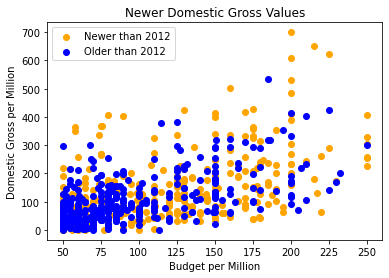

In [34]:
new_domestic, ax = plt.subplots()

x = budgets_new['production_budget']
y = budgets_new['domestic_gross']

plt.title('Newer Domestic Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Domestic Gross per Million')

def format_number(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter

def format_numbery(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)
           
ax.scatter(x[budgets_new['release_year'] >= 2012], y[budgets_new['release_year'] >= 2012], color='orange', label='Newer than 2012');
ax.scatter(x[budgets_new['release_year'] < 2012], y[budgets_new['release_year'] < 2012], color='blue', label='Older than 2012');

ax.legend()
plt.savefig('new_domestic.png', dpi = 400)

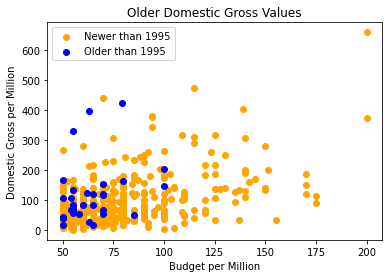

In [35]:
old_domestic, ax = plt.subplots()

plt.title('Older Domestic Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Domestic Gross per Million')

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)

x = budgets_old['production_budget']
y = budgets_old['domestic_gross']

ax.scatter(x[budgets_old['release_year'] >= 1995], y[budgets_old['release_year'] >= 1995], color='orange', label='Newer than 1995');
ax.scatter(x[budgets_old['release_year'] < 1995], y[budgets_old['release_year'] < 1995], color='blue', label='Older than 1995');

ax.legend()
plt.savefig('old_domestic.png', dpi = 400)

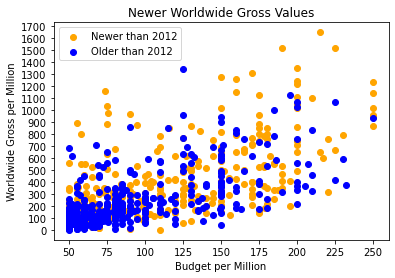

In [36]:
new_worldwide, ax = plt.subplots()

plt.title('Newer Worldwide Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Worldwide Gross per Million')

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)

x = budgets_new['production_budget']
y = budgets_new['worldwide_gross']

ax.scatter(x[budgets_new['release_year'] >= 2012], y[budgets_new['release_year'] >= 2012], color='orange',label='Newer than 2012');
ax.scatter(x[budgets_new['release_year'] < 2012], y[budgets_new['release_year'] < 2012], color='blue', label='Older than 2012');

ax.legend()
plt.savefig('new_worldwide.png', dpi = 400)

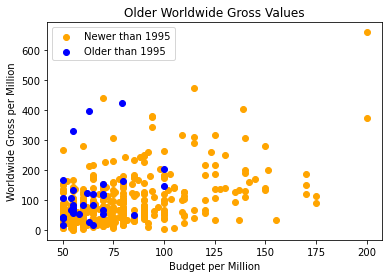

In [119]:
old_worldwide, ax = plt.subplots()

plt.title('Older Worldwide Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Worldwide Gross per Million')

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)

x = budgets_old['production_budget']
y = budgets_old['domestic_gross']

ax.scatter(x[budgets_old['release_year'] >= 1995], y[budgets_old['release_year'] >= 1995], color='orange', label='Newer than 1995');
ax.scatter(x[budgets_old['release_year'] < 1995], y[budgets_old['release_year'] < 1995], color='blue', label='Older than 1995');

ax.legend()
plt.savefig('old_worldwide.png', dpi = 400)

In [134]:
sj = budgets_clean[budgets_clean['movie'] == "Steve Jobs"]
sj_budget = sj['production_budget']
sj_domestic = sj['domestic_gross']
sj_world = sj['worldwide_gross']
sj

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
1959,60,"Oct 9, 2015",Steve Jobs,30000000,17766658,35579007,2015


In [135]:
sn = budgets[budgets['movie'] == "The Social Network"]
sn_domestic = sn['domestic_gross']
sn_world = sn['worldwide_gross']
sn_budget = sn['production_budget']
sn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
1390,91,"Oct 1, 2010",The Social Network,40000000,96962694,224922135,2010


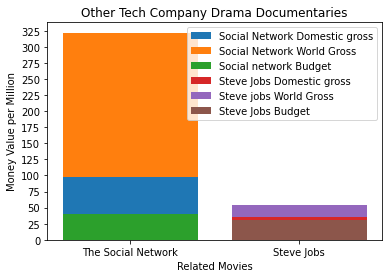

In [149]:
steve = ['Steve Jobs']
x = ['The Social Network']

Tech_movies, ax = plt.subplots()
width = .8
ax.bar(x, sn_domestic, width, label = 'Social Network Domestic gross')
ax.bar(x, sn_world, width, bottom = sn_domestic, label = 'Social Network World Gross')
ax.bar(x, sn_budget, width, label = "Social network Budget")

ax.bar(steve, sj_world, width, label = 'Steve Jobs Domestic gross');
ax.bar(steve, sj_domestic, width, bottom = sj_world, label = 'Steve jobs World Gross');
ax.bar(steve, sj_budget, width, label = "Steve Jobs Budget");
ax.legend()
plt.yticks(np.arange(0,325_000_001, 25_000_000))
ax.yaxis.set_major_formatter(format_numbery)

plt.title('Other Tech Company Drama Documentaries');
plt.xlabel('Related Movies');
plt.ylabel('Money Value per Million');
plt.savefig('Tech_movies.png', dpi = 400)